In [1]:
from cnn import CnnNet
import torch
import shap
from WeaponData import WeaponData
from pytorch_model_summary import summary
import numpy as np

dataset = WeaponData()

net = torch.load('./output_data/models/weapon_dataset')
# print(summary(net, torch.zeros((1, 3, 100, 100)).cuda(), show_input=True))

['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone']


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


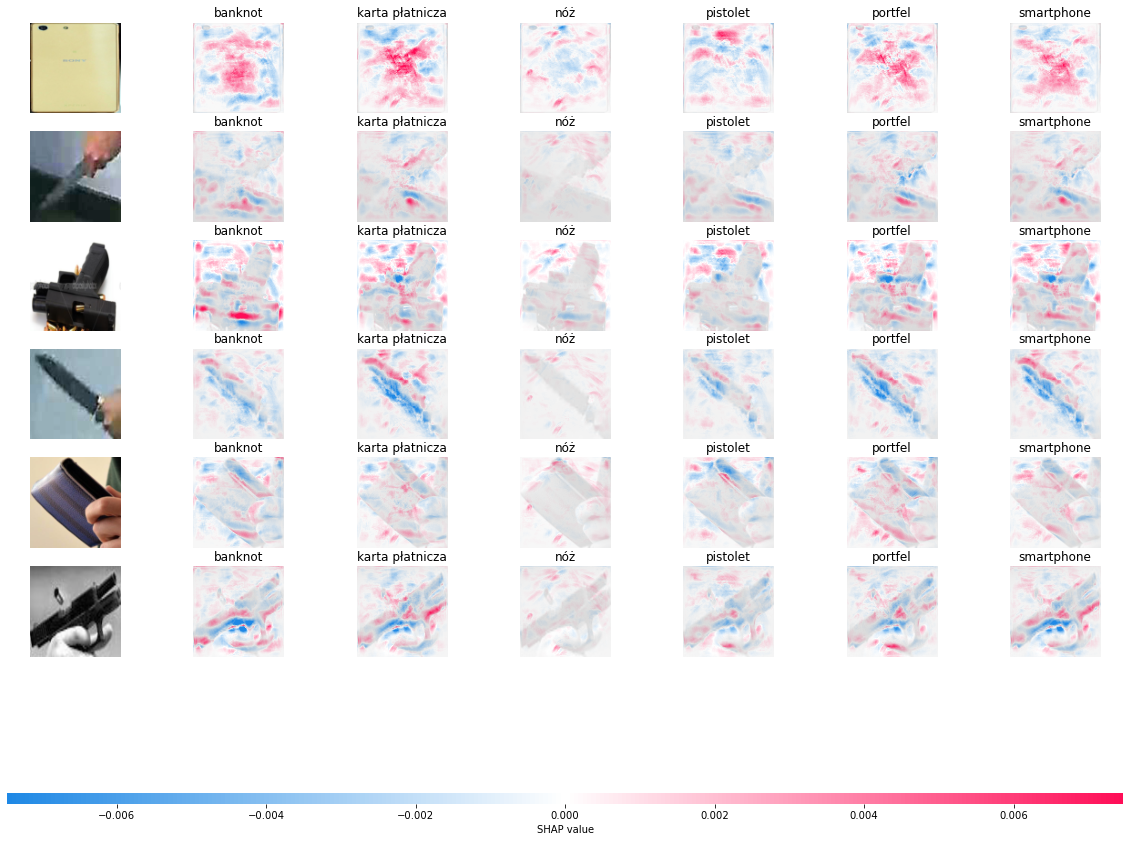

In [2]:

batch = next(iter(dataset.testloader))
images, labels = batch

# print(labels)

for b_index,b in enumerate(images):
    for c_index,c in enumerate(b):
        images[b_index, c_index] -= c.min()
        images[b_index, c_index] /= (c.max() - c.min())
        images[b_index, c_index] = torch.nan_to_num(images[b_index, c_index])


background = images[:30]
test_images = images[24:30]

e = shap.DeepExplainer(net, background.cuda())
shap_values = e.shap_values(test_images.cuda())


shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.cpu().numpy(), 1, -1), 1, 2)
shap.image_plot(shap_numpy, test_numpy ,labels=[['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone'], ['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone'], ['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone'], ['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone'], ['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone'] ,['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone']])

# ['banknot', 'karta płatnicza', 'nóż', 'pistolet', 'portfel', 'smartphone']